In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None
%matplotlib inline
import matplotlib
#matplotlib.use('agg')
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
from functools import reduce

In [2]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/compounds_reduced.csv",sep="\t",index_col=0)
compounds=compounds.query('decade != 2000')
compounds=compounds.reindex()
compounds.drop('compounds',axis=1,inplace=True)
compounds.head()

KeyboardInterrupt: 

In [3]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t")
heads=heads.query('decade != 2000')
heads=heads.reindex()
heads

,head,decade,context,count
0,a_n,1800,a_a,4
1,a_n,1810,a_a,20
2,a_n,1820,a_a,10
3,a_n,1830,a_a,14
4,a_n,1840,a_a,14
5,a_n,1850,a_a,34
6,a_n,1860,a_a,52
7,a_n,1870,a_a,14
8,a_n,1880,a_a,23
9,a_n,1890,a_a,30


In [4]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t")
modifiers=modifiers.query('decade != 2000')
modifiers=modifiers.reindex()
modifiers

,modifier,decade,context,count
0,a_n,1830,a_n,1
1,a_n,1870,a_n,1
2,a_n,1880,a_n,3
3,a_n,1890,a_n,1
4,a_n,1900,a_n,1
5,a_n,1910,a_n,2
6,a_n,1920,a_n,15
7,a_n,1930,a_n,34
8,a_n,1940,a_n,13
9,a_n,1950,a_n,39


In [5]:
compound_decade_counts=compounds.groupby(['decade'])['count'].sum().to_frame()
compound_decade_counts.columns=['N']
compound_decade_counts

,N
decade,
1800,1299884
1810,2183326
1820,3456974
1830,4890701
1840,6562000
1850,10533767
1860,9437783
1870,12216442
1880,18060550


## PPMI , LMI, LL

In [6]:
XY=compounds.groupby(['modifier','head','decade'])['count'].sum().to_frame()
XY.columns=['a']
X_star=compounds.groupby(['modifier','decade'])['count'].sum().to_frame()
X_star.columns=['x_star']
Y_star=compounds.groupby(['head','decade'])['count'].sum().to_frame()
Y_star.columns=['star_y']
merge1=pd.merge(XY.reset_index(),X_star.reset_index(),on=['modifier','decade'])
information_feat=pd.merge(merge1,Y_star.reset_index(),on=['head','decade'])
information_feat['b']=information_feat['x_star']-information_feat['a']
information_feat['c']=information_feat['star_y']-information_feat['a']
information_feat=pd.merge(information_feat,compound_decade_counts.reset_index(),on=['decade'])
information_feat['d']=information_feat['N']-(information_feat['a']+information_feat['b']+information_feat['c'])
information_feat['x_bar_star']=information_feat['N']-information_feat['x_star']
information_feat['star_y_bar']=information_feat['N']-information_feat['star_y']
#information_feat['LR']=-2*np.sum(information_feat['a']*np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y'])))
information_feat.set_index(['modifier','head','decade'],inplace=True)
information_feat.replace(0,0.001,inplace=True)
information_feat['log_ratio']=2*(information_feat['a']*np.log((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))+\
information_feat['b']*np.log((information_feat['b']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y_bar']))+\
information_feat['c']*np.log((information_feat['c']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y']))+\
information_feat['d']*np.log((information_feat['d']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y_bar'])))
information_feat['ppmi']=np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))
information_feat['local_mi']=information_feat['a']*information_feat['ppmi']
information_feat.ppmi.loc[information_feat.ppmi<=0]=0
information_feat.drop(['a','x_star','star_y','b','c','d','N','d','x_bar_star','star_y_bar'],axis=1,inplace=True)
information_feat

log_ratio   ppmi  local_mi
modifier        head          decade                            
a_n             aaaaa_n       1960      165.271 13.248   119.228
                addison_n     1960      284.397  8.733   244.523
adherents_n     addison_n     1960     1327.127 17.610   986.184
college_n       addison_n     1960      107.410  4.324   112.417
conceits_n      addison_n     1960      502.546 15.743   393.583
invention_n     addison_n     1960      338.137 13.010   273.200
mechanism_n     addison_n     1960      539.149 14.312   429.353
mr_n            addison_n     1960       78.429  7.078    70.780
premises_n      addison_n     1960      231.242 12.529   187.930
qualification_n addison_n     1960      263.158 11.956   215.214
secretary_n     addison_n     1960       61.417  5.837    58.367
technology_n    addison_n     1960     2608.539 10.403  2122.150
time_n          addison_n     1960       31.231  2.409    43.364
tv_n            addison_n     1960       80.196  7.206    72.062
university_n    addison_n     1960     1282.999  7.255  1117.314
view_n          addison_n     1960      128.490  7.597   113.953
a_n             anti_n        1960       95.704  3.901   105.327
allied_n        anti_n        1960      117.585  2.620   157.171
american_n      anti_n        1960    11751.163  4.307 11977.939
and_n           anti_n        1960      147.433  6.738   134.751
argentine_n     anti_n        1960      549.293  6.772   501.162
b_n             anti_n        1960     1322.081  5.026  1316.766
c_n             anti_n        1960       85.377  2.186   126.774
cabinet_n       anti_n        1960        6.678  1.125    15.752
church_n        anti_n        1960       79.801  1.806   133.676
city_n          anti_n        1960     4362.586  4.574  4454.965
community_n     anti_n        1960        7.592  0.000   -16.112
county_n        anti_n        1960     1340.658  3.839  1478.020
e_n             anti_n        1960       18.612  2.150    27.947
federal_n       anti_n        1960     4917.202  4.018  5251.219
...                                         ...    ...       ...
years_n         agathon_n     1930      883.639 10.117   637.352
                argentina_n   1930      224.383 10.117   161.867
                ethiopia_n    1930      140.231 10.117   101.167
                galvanism_n   1930      336.588 10.117   242.801
                headmaster_n  1930      238.408 10.117   171.984
                loser_n       1930      420.745 10.117   303.501
                profusion_n   1930      252.434 10.117   182.101
                tinoco_n      1930      126.206 10.117    91.050
yeomen_n        warder_n      1930      294.532 22.167   199.502
yesterday_n     whitesides_n  1930      229.208 13.776   165.318
yom_n           kippur_n      1930    11001.213 16.552  7299.510
yorker_n        cartoon_n     1930      578.576 19.555   410.664
young_n         contributor_n 1930      449.830 10.816   324.471
                czech_n       1930      749.772 10.816   540.785
                irelander_n   1930      284.877 10.816   205.498
                mccarthy_n    1930      359.854 10.816   259.577
                norval_n      1930      404.842 10.816   292.024
                winnie_n      1930     3645.974 10.816  2628.216
youth_n         aversion_n    1930      362.067 13.057   261.132
                daggoo_n      1930      778.665 13.057   561.435
                hopeful_n     1930      199.109 13.057   143.623
                hostel_n      1930     2138.636 13.057  1540.681
                partridge_n   1930      362.067 13.057   261.132
                presage_n     1930      470.724 13.057   339.472
zealand_n       paddle_n      1930      262.583 12.627   189.403
                spinach_n     1930      245.074 12.627   176.776
zeus_n          olympios_n    1930      833.800 18.061   596.003
                olympius_n    1930     1012.823 18.061   722.428
                polieus_n     1930      782.800 18.061   559.881
zone_n  

# Cosine features

In [7]:
modifier_decade_counts=modifiers.groupby(['decade'])['count'].sum().to_frame()
modifier_decade_counts.columns=['N']
modifier_decade_counts

,N
decade,
1800,1875025
1810,3132730
1820,4925152
1830,7229042
1840,9705181
1850,15688004
1860,14102063
1870,17537155
1880,26200200


In [8]:
head_decade_counts=heads.groupby(['decade'])['count'].sum().to_frame()
head_decade_counts.columns=['N']
head_decade_counts

,N
decade,
1800,2169414
1810,3624671
1820,5705766
1830,8349311
1840,11093500
1850,18032240
1860,16195725
1870,20093252
1880,30018992


In [9]:
modifier_denom=modifiers.groupby(['modifier','decade'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
modifier_denom.columns=['modifier_denom']
modifier_denom

modifier_denom
modifier        decade                
a_n             1800            49.639
                1810            57.210
                1820            58.932
                1830           101.701
                1840           189.079
                1850           345.339
                1860           401.531
                1870           568.809
                1880          1011.293
                1890          1644.760
                1900          1978.221
                1910          1869.718
                1920          1778.635
                1930          1699.540
                1940          1009.567
                1950          1241.364
                1960          1392.112
                1970          2197.178
                1980          2244.908
                1990          2946.935
aa_n            1800             7.211
                1810            34.771
                1820            24.920
                1830            10.677
                1850             2.828
                1860             5.099
                1870            15.652
                1880             6.403
                1900            15.620
                1910            41.725
...                                ...
zwitterion_n    1950             7.000
                1960             6.000
                1970            14.000
                1980             5.657
                1990           233.067
zygapophyseal_n 1960             3.000
                1970             2.828
                1980            28.320
                1990           166.352
zygote_n        1920             3.606
                1930             6.708
                1940             2.000
                1950             8.944
                1960             7.211
                1970            13.601
                1980             9.899
                1990             9.055
zygotene_n      1950             4.000
                1960            18.000
                1970            22.000
                1980            31.000
                1990            19.000
zylobalsamum_n  1890            25.456
                1900             2.828
                1910             1.414
                1920             7.071
                1930             1.414
                1960             2.828
                1970             1.414
                1990             4.243

[514067 rows x 1 columns]

In [10]:
head_denom=heads.groupby(['head',"decade"])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
head_denom.columns=['head_denom']
head_denom

head_denom
head          decade            
a_n           1800       269.318
              1810       516.640
              1820       653.046
              1830       566.634
              1840       634.276
              1850       777.192
              1860       694.444
              1870      1042.308
              1880      1403.479
              1890      1929.539
              1900      2829.036
              1910      4079.444
              1920      6502.183
              1930      7771.830
              1940      9663.573
              1950     16709.251
              1960     27050.112
              1970     39028.216
              1980     52834.975
              1990     69097.441
aa_n          1800         9.798
              1810        18.655
              1820        24.454
              1830        10.247
              1840        11.790
              1850        47.958
              1860        17.607
              1870        19.468
              1880        23.195
              1890        27.092
...                          ...
zvezda_n      1970        78.657
              1980        74.679
              1990       145.801
zvi_n         1940         2.828
              1950        25.768
              1960        47.791
              1970        58.327
              1980        74.047
              1990        92.785
zwingli_n     1850         2.828
              1860         3.162
              1870         3.317
              1880        12.845
              1890        11.874
              1900        25.729
              1910        37.855
              1920        31.097
              1930         8.775
              1940        18.868
              1950        43.898
              1960        64.761
              1970        57.061
              1980       137.139
              1990       288.285
zygmunt_n     1990        30.887
zygomycetes_n 1970         4.000
              1980        10.000
              1990        18.000
zygote_n      1980        25.000
              1990        80.486

[586758 rows x 1 columns]

In [11]:
compound_denom=compounds.groupby(['modifier','head',"decade"])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
compound_denom.columns=['compound_denom']
compound_denom

compound_denom
modifier        head           decade                
a_n             aaaaa_n        1960             9.000
                               1970            10.000
                               1980             9.000
                               1990            14.000
                addison_n      1960            19.799
                               1970            67.882
                               1980           145.664
                               1990           138.593
                anti_n         1960            27.000
                               1970            30.000
                               1980            41.000
                               1990            67.000
                archive_n      1960            50.735
                               1970           136.689
                               1980            56.683
                               1990            32.863
                atom_n         1940             9.000
                               1950            23.770
                               1960            25.495
                               1970            13.038
                               1980             9.899
                               1990             7.071
                b_n            1800            16.062
                               1810            43.704
                               1820            57.793
                               1830            99.905
                               1840           181.163
                               1850           341.621
                               1860           395.487
                               1870           564.459
...                                               ...
zurich_n        government_n   1900            14.177
                               1910            14.967
                               1950             7.483
                               1960            11.225
                seminar_n      1970           144.530
                               1980           258.544
                               1990           362.258
zwemmer_n       gallery_n      1960            18.974
                               1970            17.292
                               1980            21.213
                               1990            31.654
zwinglische_n   reformation_n  1980            32.000
                               1990            55.000
zwitterion_n    form_n         1970            14.000
                intermediate_n 1990           144.520
                mechanism_n    1990           118.000
                route_n        1990           139.621
zygapophyseal_n joint_n        1980            28.320
                               1990           167.800
zygote_n        nucleus_n      1970            11.000
                result_n       1960            12.530
                               1970            10.000
                               1980             9.220
                               1990            10.817
zygotene_n      stage_n        1960            18.000
                               1970            22.000
                               1980            31.000
                               1990            19.000
zylobalsamum_n  process_n      1890            25.456
                               1920             7.071

[3781847 rows x 1 columns]

### Similarity between Modifier and Compound

In [23]:
mod_cols=modifiers.columns.tolist()
mod_cols[-1]="mod_count"
modifiers.columns=mod_cols
#compounds.drop(['comp_count'],axis=1,inplace=True)
comp_cols=compounds.columns.tolist()
comp_cols[-1]="comp_count"
compounds.columns=comp_cols
compound_modifier_sim=pd.merge(compounds,modifiers,on=["modifier","context",'decade'])
compound_modifier_sim['numerator']=compound_modifier_sim['comp_count']*compound_modifier_sim['mod_count']
compound_modifier_sim=compound_modifier_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
compound_modifier_sim=pd.merge(compound_modifier_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head",'decade'])
compound_modifier_sim=pd.merge(compound_modifier_sim,modifier_denom.reset_index(),on=['modifier','decade'])
compound_modifier_sim['sim_with_modifier']=compound_modifier_sim['numerator']/(compound_modifier_sim['compound_denom']*compound_modifier_sim['modifier_denom'])
compound_modifier_sim.set_index(['modifier','head','decade'],inplace=True)
compound_modifier_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_modifier_sim

modifier_denom  sim_with_modifier
modifier        head           decade                                   
a_n             aaaaa_n        1960          1392.112              0.073
                addison_n      1960          1392.112              0.007
                anti_n         1960          1392.112              0.216
                archive_n      1960          1392.112              0.059
                atom_n         1960          1392.112              0.202
                b_n            1960          1392.112              0.815
                band_n         1960          1392.112              0.055
                bell_n         1960          1392.112              0.018
                bibliography_n 1960          1392.112              0.055
                bill_n         1960          1392.112              0.014
                briefe_n       1960          1392.112              0.006
                bunch_n        1960          1392.112              0.068
                c_n            1960          1392.112              0.182
                calendar_n     1960          1392.112              0.011
                campaign_n     1960          1392.112              0.085
                cell_n         1960          1392.112              0.132
                century_n      1960          1392.112              0.087
                chronicle_n    1960          1392.112              0.004
                co_n           1960          1392.112              0.073
                code_n         1960          1392.112              0.004
                coffin_n       1960          1392.112              0.010
                collection_n   1960          1392.112              0.037
                commentary_n   1960          1392.112              0.002
                connecticut_n  1960          1392.112              0.015
                corporation_n  1960          1392.112              0.156
                council_n      1960          1392.112              0.045
                cross_n        1960          1392.112              0.017
                daily_n        1960          1392.112              0.042
                decade_n       1960          1392.112              0.013
                description_n  1960          1392.112              0.080
...                                               ...                ...
zurich_n        government_n   1840            39.661              0.964
                               1850             7.211              0.964
                               1860            27.604              0.881
                               1870            58.532              0.297
                               1890            17.748              0.392
                               1900            56.710              0.230
                               1910            45.640              0.305
zwemmer_n       gallery_n      1960            18.974              1.000
                               1970            17.292              1.000
                               1980            21.213              1.000
                               1990            31.654              1.000
zwinglische_n   reformation_n  1980            32.000              1.000
                               1990            55.000              1.000
zwitterion_n    form_n         1970            14.000              1.000
                intermediate_n 1990           233.067              0.620
                mechanism_n    1990           233.067              0.506
                route_n        1990           233.067              0.599
zygapophyseal_n joint_n        1980            28.320              1.000
                               1990           166.352              0.991
zygote_n        nucleus_n      1970            13.601              0.809
                result_n       1970            13.601              0.471
                               1960             7.211              0.398
                        

In [24]:
compound_modifier_sim.sim_with_modifier.describe()

count   3734422.000
mean          0.265
std           0.303
min           0.000
25%           0.025
50%           0.123
75%           0.431
max           1.000
Name: sim_with_modifier, dtype: float64

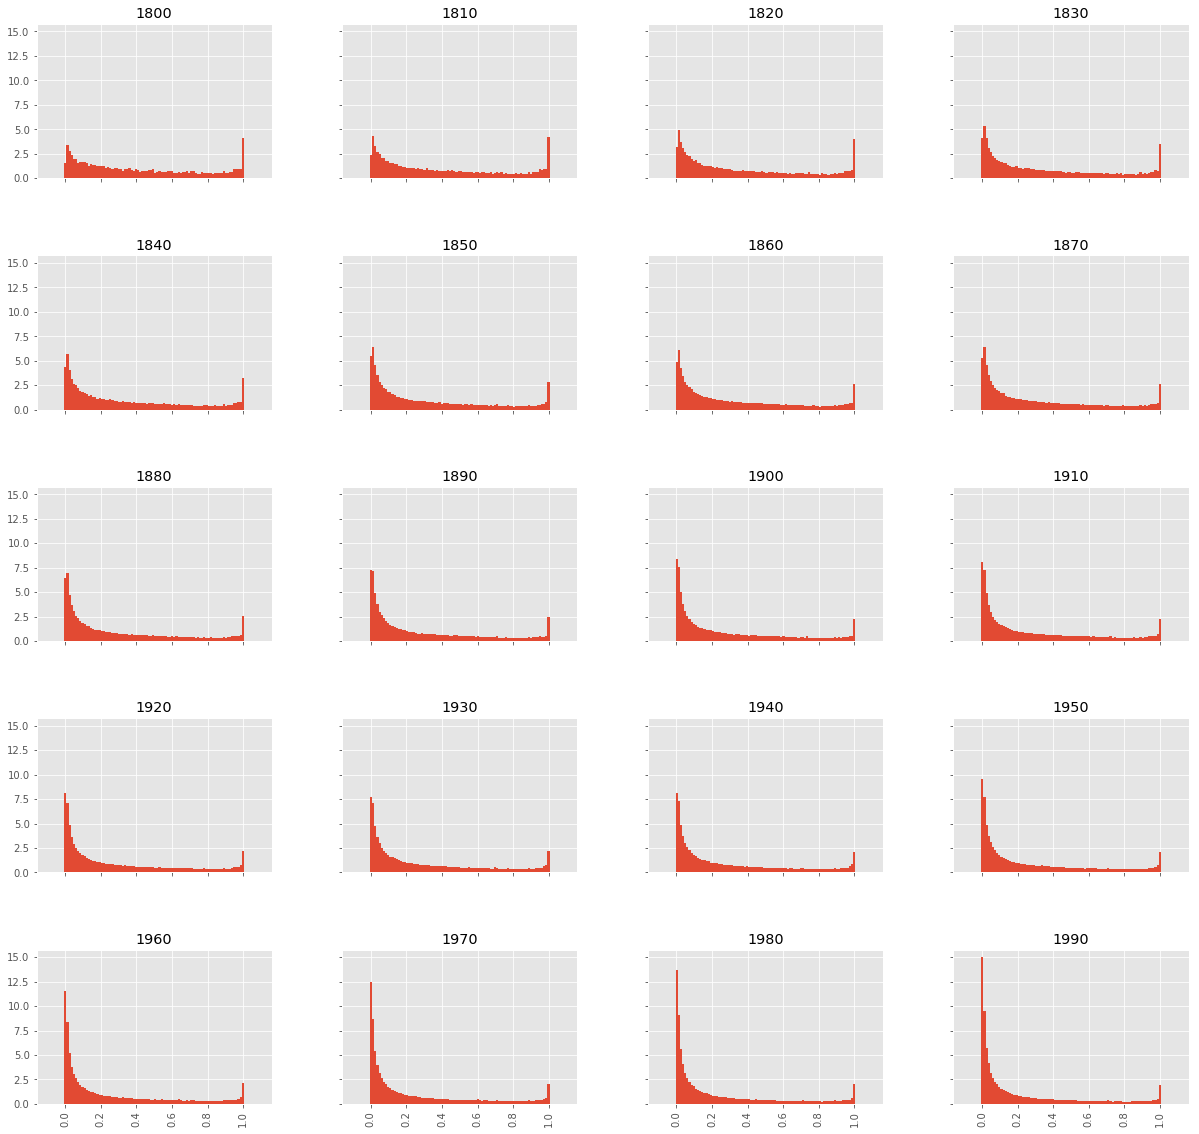

In [25]:
_=compound_modifier_sim.hist(by= 'decade',column ='sim_with_modifier', figsize=(20, 20),bins=100,density=True,sharex=True,sharey=True,range=(-0.1,1.1))

### Similarity between Head and Compound

In [33]:
head_cols=heads.columns.tolist()
head_cols[-1]="head_count"
heads.columns=head_cols

compound_head_sim=pd.merge(compounds,heads,on=["head","context",'decade'])
compound_head_sim['numerator']=compound_head_sim['comp_count']*compound_head_sim['head_count']
compound_head_sim=compound_head_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
compound_head_sim=pd.merge(compound_head_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head",'decade'])
compound_head_sim=pd.merge(compound_head_sim,head_denom.reset_index(),on=['head','decade'])
compound_head_sim['sim_with_head']=compound_head_sim['numerator']/(compound_head_sim['compound_denom']*compound_head_sim['head_denom'])
compound_head_sim.set_index(['modifier','head','decade'],inplace=True)
compound_head_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_head_sim

head_denom  sim_with_head
modifier        head          decade                           
a_n             aaaaa_n       1960         9.000          1.000
                              1970        10.000          1.000
                              1980         9.000          1.000
                              1990        14.000          1.000
                addison_n     1960       434.272          0.728
adherents_n     addison_n     1960       434.272          0.094
college_n       addison_n     1960       434.272          0.728
conceits_n      addison_n     1960       434.272          0.035
invention_n     addison_n     1960       434.272          0.043
mechanism_n     addison_n     1960       434.272          0.043
mr_n            addison_n     1960       434.272          0.100
premises_n      addison_n     1960       434.272          0.025
qualification_n addison_n     1960       434.272          0.068
secretary_n     addison_n     1960       434.272          0.016
technology_n    addison_n     1960       434.272          0.651
time_n          addison_n     1960       434.272          0.026
tv_n            addison_n     1960       434.272          0.728
university_n    addison_n     1960       434.272          0.735
view_n          addison_n     1960       434.272          0.080
a_n             addison_n     1970       555.177          0.763
adherents_n     addison_n     1970       555.177          0.042
college_n       addison_n     1970       555.177          0.763
conceits_n      addison_n     1970       555.177          0.027
technology_n    addison_n     1970       555.177          0.596
tv_n            addison_n     1970       555.177          0.763
university_n    addison_n     1970       555.177          0.766
a_n             addison_n     1980       902.950          0.721
conceits_n      addison_n     1980       902.950          0.007
group_n         addison_n     1980       902.950          0.666
invention_n     addison_n     1980       902.950          0.014
...                                          ...            ...
zocor_n         zocor_n       1990       132.665          1.000
zone_n          aride_n       1960       251.730          1.000
                              1970        69.296          1.000
                              1980        14.142          1.000
                contigue_n    1940        13.000          1.000
                              1960        12.000          1.000
                              1970        37.000          1.000
                              1980        12.000          1.000
                              1990        10.000          1.000
                flung_n       1830         8.944          1.000
                              1840        11.180          1.000
                              1860         6.708          1.000
                              1870        15.780          0.992
                              1900        13.416          1.000
                homologue_n   1930        28.000          1.000
                              1940        49.000          1.000
                              1950        44.011          1.000
                              1960        38.000          1.000
                              1980        20.273          0.987
                ophiolites_n  1990        78.000          1.000
                residuum_n    1960        40.000          0.995
                              1980        46.119          0.999
                              1990        31.544          0.992
zones_n         arides_n      1970        22.627          1.000
                synaptiques_n 1960        18.385          1.000
                              1970        32.527          1.000
                              1980        14.142          1.000
zoo_n           pottet_n      1900         9.000          1.000
zoology_n       riley_n       1940       195.625          0.171
zooplankton_n   biomass_n     1950         7.681          0.883

[3781

In [35]:
compound_head_sim.sim_with_head.describe()

count   3781847.000
mean          0.247
std           0.294
min           0.000
25%           0.023
50%           0.111
75%           0.383
max           1.000
Name: sim_with_head, dtype: float64

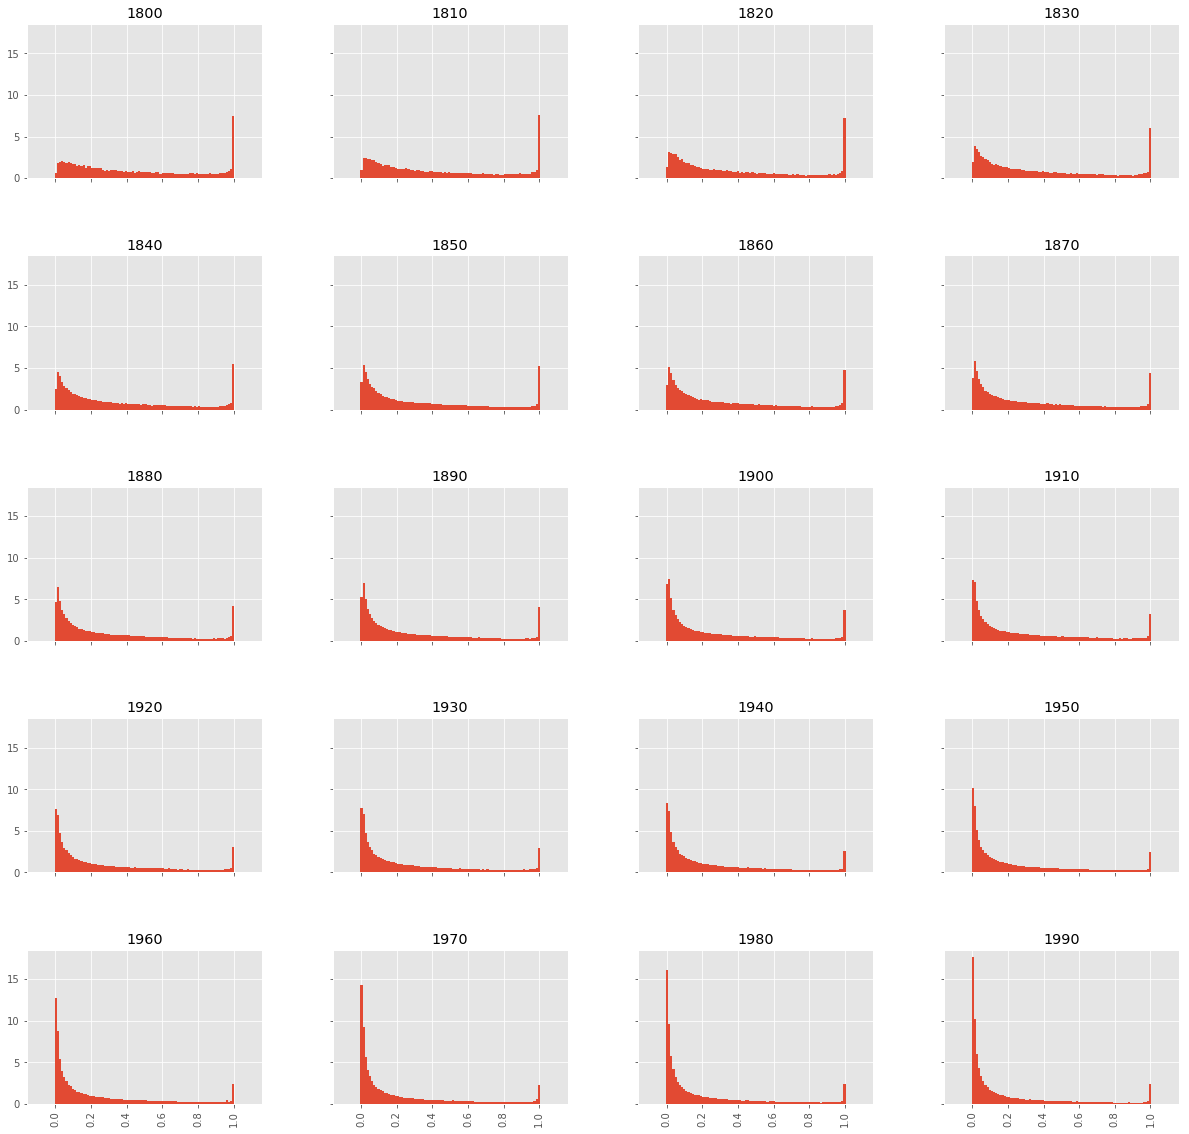

In [36]:
_=compound_head_sim.hist(by= 'decade',column ='sim_with_head', figsize=(20, 20),bins=100,density=True,sharex=True,sharey=True,range=(-0.1,1.1))

### Similarity between constituents

In [49]:
constituent_sim=pd.merge(heads,compounds,on=["head","context","decade"])
#constituent_sim.drop('comp_count',axis=1,inplace=True)
constituent_sim=pd.merge(constituent_sim,modifiers,on=["modifier","context","decade"])
constituent_sim['numerator']=constituent_sim['head_count']*constituent_sim['mod_count']
constituent_sim=constituent_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
constituent_sim=pd.merge(constituent_sim.reset_index(),head_denom.reset_index(),on=["head","decade"])
constituent_sim=pd.merge(constituent_sim,modifier_denom.reset_index(),on=["modifier","decade"])
constituent_sim['sim_bw_constituents']=constituent_sim['numerator']/(constituent_sim['head_denom']*constituent_sim['modifier_denom'])
constituent_sim.set_index(['modifier','head','decade'],inplace=True)
constituent_sim.drop(['numerator','modifier_denom','head_denom'],axis=1,inplace=True)
constituent_sim

sim_bw_constituents
modifier      head           decade                     
a_n           aaaaa_n        1960                  0.073
              addison_n      1960                  0.006
              anti_n         1960                  0.001
              archive_n      1960                  0.003
              atom_n         1960                  0.137
              b_n            1960                  0.522
              band_n         1960                  0.154
              bell_n         1960                  0.000
              bibliography_n 1960                  0.039
              bill_n         1960                  0.001
              briefe_n       1960                  0.005
              bunch_n        1960                  0.051
              c_n            1960                  0.062
              calendar_n     1960                  0.000
              campaign_n     1960                  0.006
              cell_n         1960                  0.116
              century_n      1960                  0.024
              chronicle_n    1960                  0.000
              co_n           1960                  0.000
              code_n         1960                  0.000
              coffin_n       1960                  0.000
              collection_n   1960                  0.002
              commentary_n   1960                  0.002
              connecticut_n  1960                  0.004
              corporation_n  1960                  0.001
              council_n      1960                  0.004
              cross_n        1960                  0.000
              daily_n        1960                  0.001
              decade_n       1960                  0.000
              description_n  1960                  0.047
...                                                  ...
yom_n         kippur_n       1890                  1.000
                             1900                  0.999
                             1910                  0.973
                             1920                  0.928
                             1930                  0.997
                             1940                  0.998
                             1950                  0.999
                             1960                  0.999
                             1970                  1.000
                             1980                  1.000
                             1990                  1.000
yonder_n      copse_n        1860                  0.791
younger_n     pliny_n        1820                  0.945
yucca_n       pollination_n  1890                  0.890
                             1910                  0.742
zeiss_n       binoculars_n   1940                  0.609
                             1970                  0.105
              counting_n     1910                  0.842
zeus_n        olympius_n     1840                  0.946
                             1850                  0.937
                             1860                  0.956
zhuhai_n      sezs_n         1980                  0.401
                             1990                  0.269
zinovievite_n terrorist_n    1940                  0.915
                             1950                  0.999
zone_n        flung_n        1830                  1.000
                             1860                  0.745
                             1870                  0.836
zoo_n         pottet_n       1900                  1.000
zoot_n        sims_n         1960                  0.140

[3734422 rows x 1 columns]

In [50]:
constituent_sim.sim_bw_constituents.describe()

count   3734422.000
mean          0.119
std           0.199
min           0.000
25%           0.001
50%           0.013
75%           0.150
max           1.000
Name: sim_bw_constituents, dtype: float64

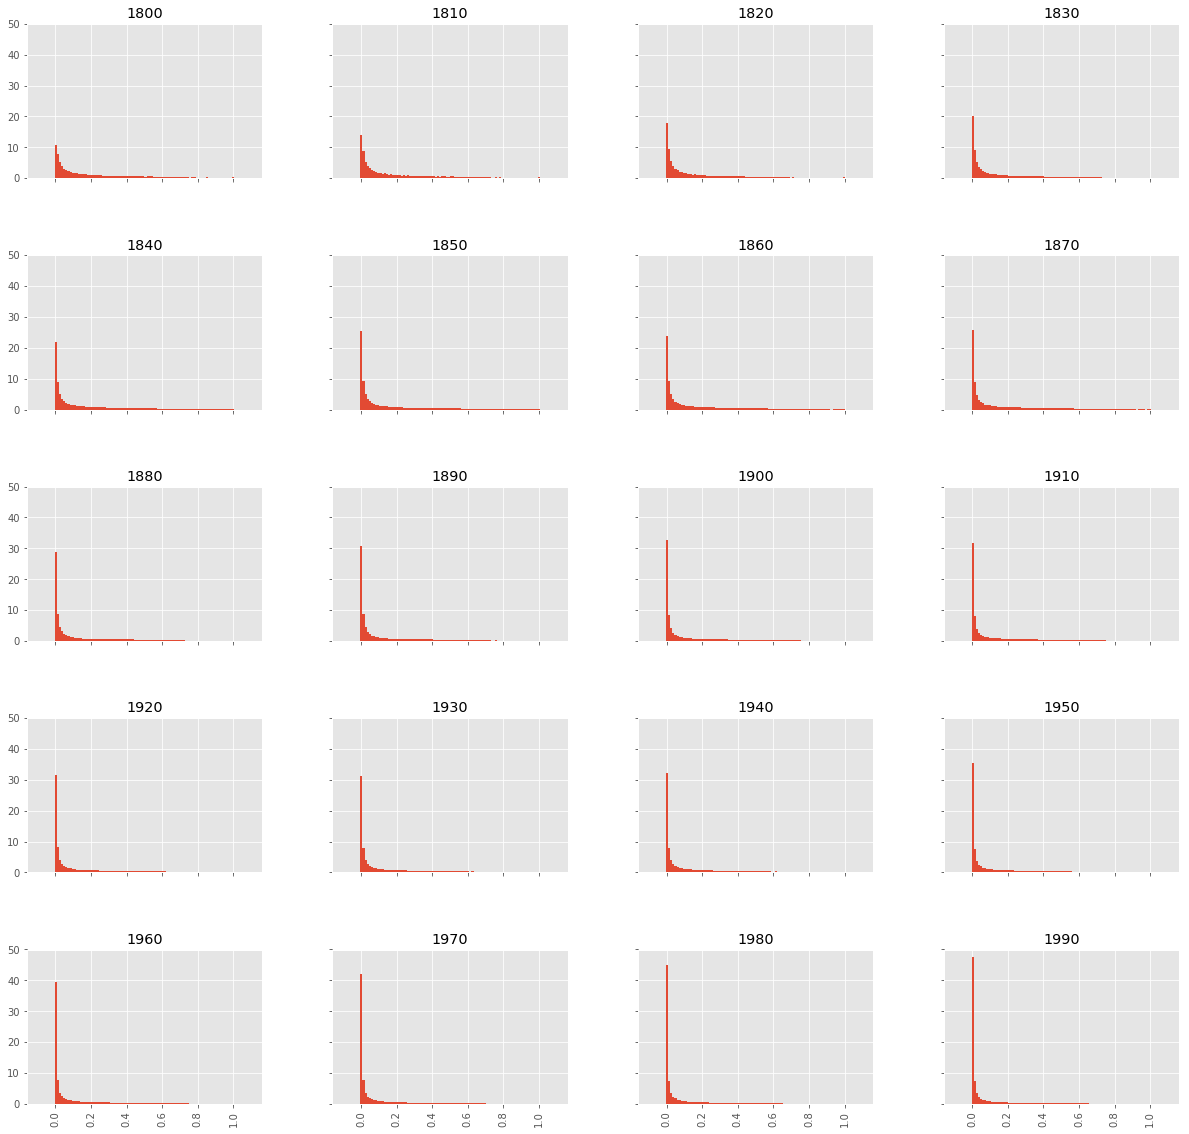

In [51]:
_=constituent_sim.hist(by= 'decade',column ='sim_bw_constituents', figsize=(20, 20),bins=100,density=True,sharex=True,sharey=True,range=(-0.1,1.1))

In [58]:
dfs = [constituent_sim.reset_index(), compound_head_sim.reset_index(), compound_modifier_sim.reset_index(), information_feat.reset_index()]
compounds_final = reduce(lambda left,right: pd.merge(left,right,on=['modifier','head','decade']), dfs)
compounds_final.drop(['head_denom','modifier_denom'],axis=1,inplace=True)
compounds_final=pd.pivot_table(compounds_final, index=['modifier','head'], columns=['decade'])
compounds_final.fillna(0,inplace=True)
compounds_final -= compounds_final.min()
compounds_final /= compounds_final.max()
compounds_final_1=compounds_final.columns.get_level_values(0)
compounds_final_2=compounds_final.columns.get_level_values(1)

cur_year=0
new_columns=[]
for year in compounds_final_2:
    new_columns.append(str(year)+"_"+compounds_final_1[cur_year])
    cur_year+=1
compounds_final.columns=new_columns
compounds_final

1800_local_mi  1810_local_mi  1820_local_mi  \
modifier        head                                                          
a_n             aaaaa_n                 0.006          0.005          0.004   
                addison_n               0.006          0.005          0.004   
                anti_n                  0.006          0.005          0.004   
                archive_n               0.006          0.005          0.004   
                atom_n                  0.006          0.005          0.004   
                b_n                     0.007          0.008          0.006   
                band_n                  0.006          0.005          0.004   
                baseball_n              0.006          0.005          0.004   
                behavior_n              0.006          0.005          0.004   
                bell_n                  0.006          0.005          0.004   
                berkley_n               0.006          0.005          0.004   
                bibliography_n          0.006          0.005          0.004   
                bill_n                  0.006          0.005          0.004   
                bird_n                  0.006          0.005          0.004   
                board_n                 0.006          0.005          0.004   
                book_n                  0.006          0.005          0.004   
                boswell_n               0.006          0.005          0.004   
                brand_n                 0.006          0.005          0.004   
                briefe_n                0.006          0.005          0.004   
                bunch_n                 0.006          0.005          0.004   
                burn_n                  0.006          0.005          0.004   
                c_n                     0.010          0.006          0.004   
                calendar_n              0.006          0.005          0.004   
                call_n                  0.006          0.005          0.004   
                campaign_n              0.006          0.005          0.004   
                cassell_n               0.006          0.005          0.004   
                cat_n                   0.006          0.005          0.004   
                cataloguing_n           0.006          0.005          0.004   
                cell_n                  0.006          0.005          0.004   
                century_n               0.006          0.005          0.004   
...                                       ...            ...            ...   
zuni_n          mountain_n              0.006          0.005          0.004   
                origin_n                0.006          0.005          0.004   
                prehistory_n            0.006          0.005          0.004   
                religion_n              0.006          0.005          0.004   
                ruin_n                  0.006          0.005          0.004   
                sacred_n                0.006          0.005          0.004   
                social_n                0.006          0.005          0.004   
                tradition_n             0.006          0.005          0.004   
                tribe_n                 0.006          0.005          0.004   
                village_n               0.006          0.005          0.004   
                war_n                   0.006          0.005          0.004   
                word_n                  0.006          0.005          0.004   
zunyi_n         conference_n            0.006          0.005          0.004   
zurich_n        acm_n                   0.006          0.005          0.004   
                agreement_n             0.006          0.005          0.004   
                chamber_n               0.006          0.005          0.004   
                conference_n            0.006          0.005          0.004   
                government_n            0.006          0.005          0.004   
   

In [59]:
compounds_final.to_csv("/data/dharp/compounding/datasets/DFM_Contextual_Temporal.csv",sep='\t')